In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_csv('data/Language Detection.csv')
print(df.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [4]:
cv = CountVectorizer()
x = np.array(df["Text"]) 
X = cv.fit_transform(x)
y = np.array(df["Language"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [5]:
#Model 1
mNB_model = MultinomialNB()
mNB_model.fit(X_train, y_train)
y_pred_mnb = mNB_model.predict(X_test)
acc_score_mnb = accuracy_score(y_pred_mnb, y_test)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print('accuracy mnb:  %s' % acc_score_mnb)

#Model 2
SGD_model = SGDClassifier()
SGD_model.fit(X_train, y_train)
y_pred_sgd = SGD_model.predict(X_test)
acc_score_sgd = accuracy_score(y_pred_sgd, y_test)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
print('accuracy sgd  %s' % acc_score_sgd)

accuracy mnb:  0.9840425531914894
accuracy sgd  0.9656673114119922


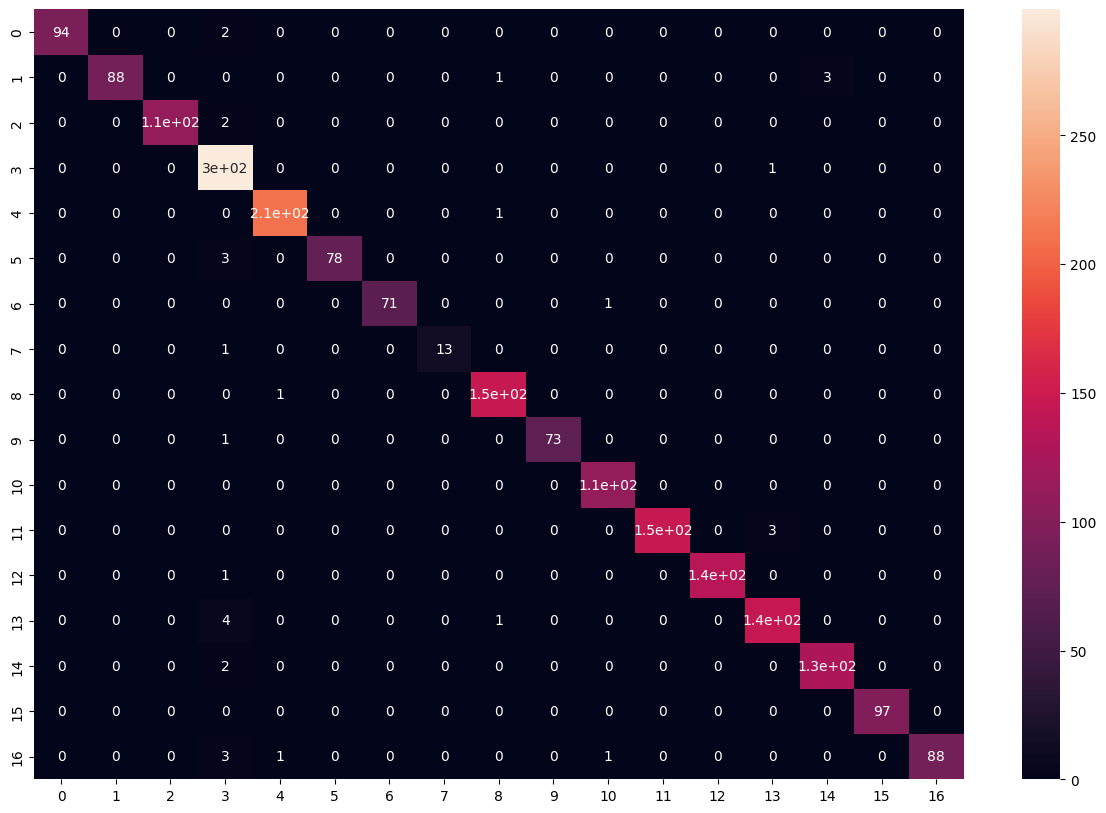

In [6]:
plt.figure(figsize=(15, 10))
seaborn.heatmap(cm_mnb, annot=True)
plt.show()


In [8]:
import pickle
pickle.dump(mNB_model, open('models/mnb.sav', 'wb'))
pickle.dump(SGD_model, open('models/sgd.sav', 'wb'))